In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
#from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [97]:
df_train = pd.read_csv('Downloads/petr4_treinamento.csv')
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [98]:
for coluna in df_train.columns:
    if df_train[coluna].dtype == 'float64':
        if df_train[coluna].isna().any():
            media = df_train[coluna].mean()
            df_train[coluna].fillna(media, inplace=True)

In [99]:
abertura = df_train.iloc[: , 1:2].values
abertura

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [100]:
maximo = df_train.iloc[: , 2:3].values
maximo

array([[20.209999],
       [20.4     ],
       [20.620001],
       ...,
       [16.139999],
       [16.129999],
       [16.1     ]])

In [101]:
normalizador = MinMaxScaler()
abertura = normalizador.fit_transform(abertura)
maximo = normalizador.fit_transform(maximo)

In [18]:
abertura

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [19]:
maximo

array([[0.77266112],
       [0.78187106],
       [0.79253519],
       ...,
       [0.57537562],
       [0.57489089],
       [0.57343674]])

In [102]:
timestamp = 90
x_train1 = []
x_train2 = []
previsores = []

In [103]:
for i in range(timestamp, abertura.shape[0]):
    previsores.append(abertura[i - timestamp:i, 0])
    x_train1.append(abertura[i, 0])
    x_train2.append(maximo[i, 0])

In [104]:
previsores, x_train1, x_train2 = np.array(previsores), np.array(x_train1), np.array(x_train2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1155, 90, 1)

In [105]:
x_train = np.column_stack((x_train1, x_train2))
x_train.shape

(1155, 2)

In [54]:
model = Sequential()

model.add(LSTM(120, return_sequences=True, input_shape = (previsores.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(2))

model.compile(optimizer = 'rmsprop', loss ='mean_squared_error', metrics = ['mean_absolute_error'])

In [55]:
model.fit(previsores, x_train, epochs = 100, batch_size = 20)

Epoch 1/100
58/58 [==============================] - 117s 1s/step - loss: 0.0304 - mean_absolute_error: 0.1195
Epoch 2/100
58/58 [==============================] - 80s 1s/step - loss: 0.0142 - mean_absolute_error: 0.0925
Epoch 3/100
58/58 [==============================] - 89s 2s/step - loss: 0.0118 - mean_absolute_error: 0.0835
Epoch 4/100
58/58 [==============================] - 81s 1s/step - loss: 0.0096 - mean_absolute_error: 0.0754
Epoch 5/100
58/58 [==============================] - 86s 1s/step - loss: 0.0085 - mean_absolute_error: 0.0705
Epoch 6/100
58/58 [==============================] - 73s 1s/step - loss: 0.0080 - mean_absolute_error: 0.0682
Epoch 7/100
58/58 [==============================] - 81s 1s/step - loss: 0.0067 - mean_absolute_error: 0.0634
Epoch 8/100
58/58 [==============================] - 70s 1s/step - loss: 0.0065 - mean_absolute_error: 0.0612
Epoch 9/100
58/58 [==============================] - 84s 1s/step - loss: 0.0063 - mean_absolute_error: 0.0602
Epoch 10/

In [61]:
df_test = pd.read_csv('Downloads/petr4_teste.csv')
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [111]:
abertura2 = df_test.iloc[: , 1:2].values
abertura2

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [112]:
maximo2 = df_test.iloc[: , 2:3].values
maximo2

array([[16.549999],
       [16.719999],
       [16.959999],
       [16.860001],
       [17.030001],
       [17.16    ],
       [17.049999],
       [17.299999],
       [17.41    ],
       [17.440001],
       [17.84    ],
       [18.360001],
       [18.530001],
       [18.42    ],
       [18.469999],
       [18.459999],
       [19.629999],
       [19.34    ],
       [19.98    ],
       [20.049999],
       [19.77    ],
       [19.93    ]])

In [113]:
base_completa = pd.concat((df_train['Open'], df_test['High']), axis = 0)
base_completa

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
17    19.340000
18    19.980000
19    20.049999
20    19.770000
21    19.930000
Length: 1267, dtype: float64

In [114]:
entradas = base_completa[len(base_completa) - len(df_test) - timestamp:].values.reshape(-1,1)

In [115]:
entradas = normalizador.transform(entradas)

In [116]:
test = []

for i in range(timestamp, entradas.shape[0]):
    test.append(entradas[i - timestamp:i, 0])
test = np.array(test)
test = np.reshape(test, (test.shape[0], test.shape[1], 1))

In [117]:
pred = model.predict(test)
pred = normalizador.inverse_transform(pred)
pred

1/1 [==============================] - 1s 1s/step


array([[16.320213, 16.501543],
       [16.471071, 16.65302 ],
       [16.676517, 16.859623],
       [16.908875, 17.093506],
       [17.060026, 17.246164],
       [17.156002, 17.343554],
       [17.238417, 17.427464],
       [17.267975, 17.458555],
       [17.319738, 17.512022],
       [17.409985, 17.604183],
       [17.503233, 17.699373],
       [17.670805, 17.86898 ],
       [17.977875, 18.178385],
       [18.322996, 18.525923],
       [18.54542 , 18.750284],
       [18.635015, 18.841246],
       [18.632616, 18.83996 ],
       [18.893627, 19.10317 ],
       [19.191551, 19.404068],
       [19.544184, 19.760109],
       [19.852427, 20.07175 ],
       [19.964483, 20.186544]], dtype=float32)

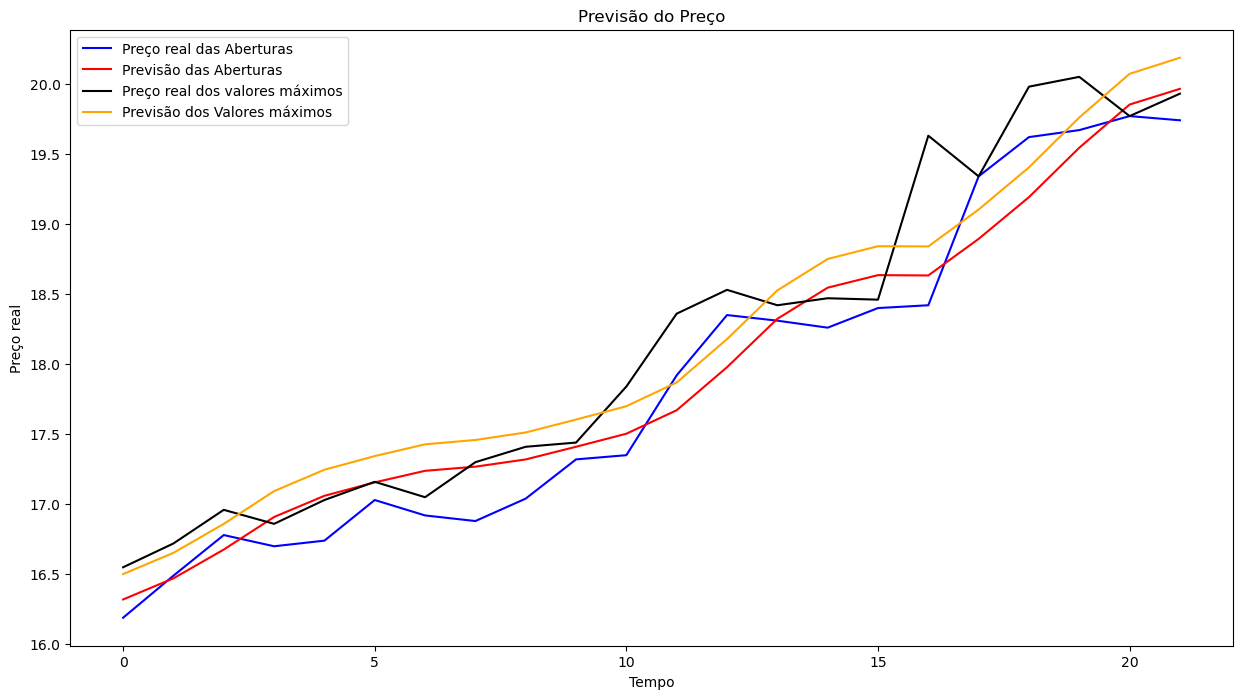

In [127]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 8

plt.plot(abertura2, color='blue', label='Preço real das Aberturas')
plt.plot(pred[:, 0], color='red', label='Previsão das Aberturas')



plt.plot(maximo2, color='black', label='Preço real dos valores máximos')
plt.plot(pred[:, 1], color='orange', label='Previsão dos Valores máximos')

plt.title('Previsão do Preço')
plt.xlabel('Tempo')
plt.ylabel('Preço real')

plt.legend()


plt.show()